# Data Analysis Interview Challenge (OVERVIEW)

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
    proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
    observation
c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats.


## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
    data for this analysis (a few sentences/plots describing your approach will suffice). What
    fraction of the observed users were retained?
    
2. Build a predictive model to help Ultimate determine whether or not a user will be active
    in their 6th month on the system. Discuss why you chose your approach, what
    alternatives you considered, and any concerns you have. How valid is your model?
    Include any key indicators of model performance.
   
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
    improve its longterm
    rider retention (again, a few sentences will suffice).


### Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
    signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
    FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday


In [183]:
## Loading libraries for the JSON Exercise
import pandas as pd
import json
import seaborn as sns
from pandas.io.json import json_normalize
from itertools import chain
import plotly
import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np


import plotly.graph_objs as go

## Regression Models
# Models for the splitting the samples into train_test
from sklearn.model_selection import train_test_split
from sklearn import model_selection


## Models for Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model, datasets
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score


# Model Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

# Model Optimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load json as string
file = open('I:/logins.json')
df_raw=pd.read_json(file, orient='columns')
df_raw.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
## Converting the timestamp attribute to a timestamp for analysis

df=df_raw
df['login_time'] = pd.to_datetime (df['login_time'])
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
## Describing the timestamp data
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
## Looking at the minimum value for the login time
df.min()

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

In [6]:
## Looking at the maximum value for the login time
df.max()

login_time   1970-04-13 18:57:38
dtype: datetime64[ns]

In [7]:
# need datetime index to resample
df1 = df_raw.set_index(['login_time'])

In [8]:
# add 'count' column
df1['count'] = 0
df1 = df1.resample('15T').count()
df1 = df1.reset_index()
df1.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [9]:
# need datetime index to resample in 30 minute intervals for df2 dataframe
df2 = df_raw.set_index(['login_time'])

In [10]:
# add 'count' column
df2['count'] = 0
df2 = df2.resample('60T').count()
df2 = df2.reset_index()
df2.head()

,login_time,count
0,1970-01-01 20:00:00,24
1,1970-01-01 21:00:00,9
2,1970-01-01 22:00:00,21
3,1970-01-01 23:00:00,58
4,1970-01-02 00:00:00,53


In [11]:
## Initiating Pandas Profile for a quick overview of the dataset 
import pandas_profiling

pandas_profiling.ProfileReport(df1)

Number of variables,2
Number of observations,9788
Total Missing (%),0.0%
Total size in memory,153.0 KiB
Average record size in memory,16.0 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [12]:
##############################################################################################################

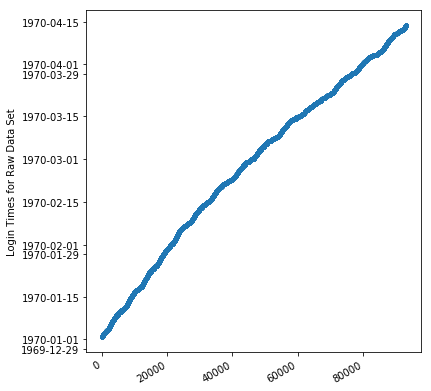

In [11]:
## Graphing the Raw Login Times for the initial dataset
axes = df_raw['login_time'].plot(marker='.', alpha=0.5, linestyle='--', figsize=(6, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Login Times for Raw Data Set')

df['login_time'] = pd.to_datetime(df['login_time'])
type(df)

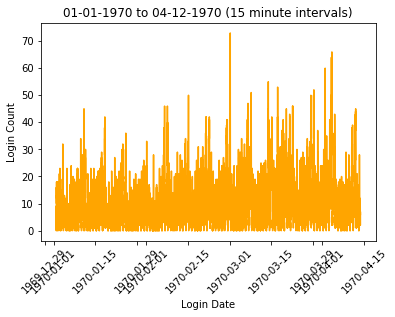

In [12]:
# Graping the 15 Minute Time intervals for the grouped dataset for DF1
plt.plot(df1['login_time'], df1['count'], color='orange')
plt.xticks(rotation = 45)
plt.xlabel('Login Date')
plt.ylabel('Login Count')
plt.title('01-01-1970 to 04-12-1970 (15 minute intervals)');

In [13]:
## Creating a year, month, week, day, hour, minute and daytime column from the raw dataset
df10=df_raw
df10['year']=df10['login_time'].dt.year
df10['month']=df10['login_time'].dt.month
df10['week']=df10['login_time'].dt.week
df10['day']=df10['login_time'].dt.day
df10['hour']=df10['login_time'].dt.hour
df10['minute']=df10['login_time'].dt.minute
df10['day_of_week'] = df10['login_time'].dt.day_name()

df10.head(3)

,login_time,year,month,week,day,hour,minute,day_of_week
0,1970-01-01 20:13:18,1970,1,1,1,20,13,Thursday
1,1970-01-01 20:16:10,1970,1,1,1,20,16,Thursday
2,1970-01-01 20:16:37,1970,1,1,1,20,16,Thursday


In [14]:
## Grouping the df10 by day and logintime
df_11=df10.groupby(['day'])['login_time'].count()
df_11.head(5)

day
1    3194
2    3044
3    3475
4    4037
5    3223
Name: login_time, dtype: int64

In [15]:
## Grouping the df10 by month and logintime
df_12=df10.groupby(['month'])['login_time'].count()
df_12.head(5)

month
1    21239
2    24673
3    33723
4    13507
Name: login_time, dtype: int64

In [16]:
## Grouping the df10 by day_of_week and logintime
df_13=df10.groupby(['day_of_week'])['login_time'].count()
df_13.head()

day_of_week
Friday      15208
Monday       8823
Saturday    19377
Sunday      18167
Thursday    11960
Name: login_time, dtype: int64

In [17]:
## Transposing the data series to dataframe
df_13a = df_13.rename(None).to_frame().T
print (df_13a)

day_of_week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0             15208    8823     19377   18167     11960     9268      10339


In [18]:
## Looking at the transposed dataset 
df_13a.describe()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0
25%,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0
50%,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0
75%,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0
max,15208.0,8823.0,19377.0,18167.0,11960.0,9268.0,10339.0


In [22]:
## Converting the series to a dataframe to use the sns plotting functions
day_of_week= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
Login_Count = [8823, 9268, 10339, 11960, 15208, 19377, 18167] 
  
week_series = pd.Series(day_of_week) 
login_series = pd.Series(Login_Count) 
  
frame = { 'day_of_week': week_series, 'Login_Count': login_series} 
  
result = pd.DataFrame(frame) 
  
print(result)

  day_of_week  Login_Count
0      Monday         8823
1     Tuesday         9268
2   Wednesday        10339
3    Thursday        11960
4      Friday        15208
5    Saturday        19377
6      Sunday        18167


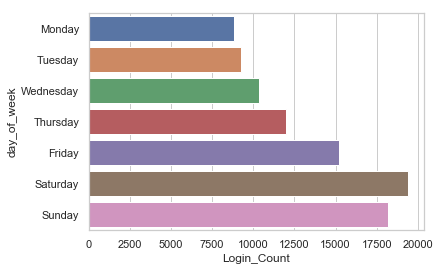

In [23]:
## Plotting the results from the login times per day_of_week
sns.set(style="whitegrid") 
ax = sns.barplot(x="Login_Count", y="day_of_week", data=result)

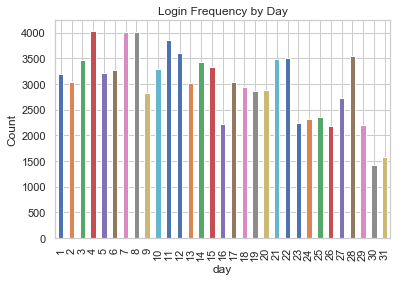

In [24]:
## Grouping by Day of month for the bar plot
plt.title('Login Frequency by Day')
plt.ylabel('Count')
df10.groupby("day")['login_time'].count().plot(kind='bar')

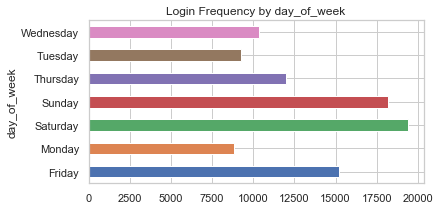

In [25]:
## Grouping by day_of_week and bar plot function
ax = plt.subplots(figsize=(6,3))
plt.title('Login Frequency by day_of_week')
plt.ylabel('Count')
df10.groupby("day_of_week")['login_time'].count().plot(kind='barh')

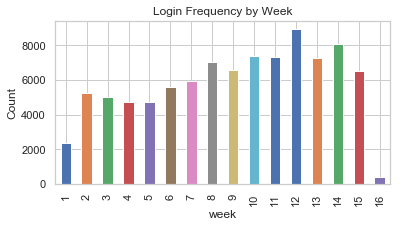

In [26]:
## Grouping by week and bar plot function
ax = plt.subplots(figsize=(6,3))
plt.title('Login Frequency by Week')
plt.ylabel('Count')
df10.groupby("week")['login_time'].count().plot(kind='bar')

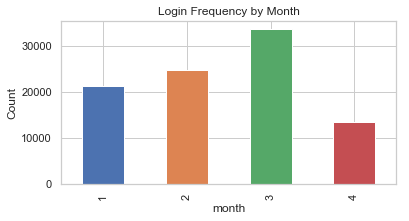

In [27]:
## Grouping by month and bar plot function
ax = plt.subplots(figsize=(6,3))
plt.title('Login Frequency by Month')
plt.ylabel('Count')

df10.groupby("month")['login_time'].count().plot(kind='bar')

In [28]:
################################################################################

In [29]:
# load json as string for second data set
file = open('I:/ultimate_data_challenge.json')
data = json.load(file)

In [30]:
data

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [31]:
type(data)

list

In [32]:
## Normalizing json datafile 
data1=json_normalize(data)

data1.head(7)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0


In [79]:
## Quick overview with Panda Profiler
import pandas_profiling

pandas_profiling.ProfileReport(data1)

Number of variables,12
Number of observations,50000
Total Missing (%),1.5%
Total size in memory,4.2 MiB
Average record size in memory,89.0 B
Numeric,7
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [33]:
## Describe the data
data1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [34]:
## Column Check for data
data1.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [35]:
## CHecking to see which columns have NAN 
data1.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

In [36]:
## Creating another dataframe for analysis
data2=data1

In [37]:
## creating a new column for this variable 
data2['avg_rating_by_driver_t']=data2['avg_rating_by_driver']
data2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,5.0


In [38]:
## replacing all nan values with 0
data2['avg_rating_by_driver_t'] = data2['avg_rating_by_driver_t'].replace(np.nan, 0)
data2.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0


In [39]:
## creating a new bin category for this variable 
data2['avg_rating_by_driver_bin'] = pd.cut(x=data2['avg_rating_by_driver_t'], bins=[1, 2, 3, 4, 5], labels=['2','3','4','5'])
data2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0,5
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5.0,5
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,5.0,5


In [40]:
## creating a new column for this variable 
data2['avg_rating_of_driver_t']=data2['avg_rating_of_driver']
data2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0,5,4.7
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5.0,5,5.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,5.0,5,4.3


In [41]:
## Replacing all nan values with 0
data2['avg_rating_of_driver_t'] = data2['avg_rating_of_driver_t'].replace(np.nan, 0)
data2.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0,5,4.7


In [42]:
## creating a new column for this variable 
data2['avg_rating_of_driver_bin'] = pd.cut(x=data2['avg_rating_of_driver_t'], bins=[1, 2, 3, 4, 5], labels=['2','3','4','5'])
data2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0,5,4.7,5
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5.0,5,5.0,5
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,5.0,5,4.3,5


In [43]:
## Replacing all NAN values with 1
data2['avg_rating_of_driver_bin'] = data2['avg_rating_of_driver_bin'].replace(np.nan, 1)
data2.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5.0,5,4.7,5


In [44]:
## Saving data to csv file 
submit=pd.DataFrame(data=data2)
submit.to_csv('ultimate2_19.csv',index= True)

In [45]:
## Loading the data files for Model Devopment
data_raw = pd.read_csv('C:/Users/jlpar/Documents/Springboard Curriculum/Course/Course Material/Unit 17/Relax Challenge/ultimate2_19.csv')
data_raw.head(3)


,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,1,False,0.0,0.0,1,5.0,5,iPhone
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,1,False,0.0,0.0,1,2.0,2,iPhone
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,1,False,0.0,0.0,1,0.0,1,iPhone


In [46]:
## CHecking to see which columhs have NAN 
data_raw.isnull().any()

Unnamed: 0                  False
avg_dist                    False
avg_rating_by_driver         True
avg_rating_of_driver         True
avg_surge                   False
city                        False
last_trip_date              False
phone                       False
signup_date                 False
surge_pct                   False
trips_in_first_30_days      False
ultimate_black_user         False
weekday_pct                 False
avg_rating_by_driver_t      False
avg_rating_by_driver_bin    False
avg_rating_of_driver_t      False
avg_rating_of_driver_bin    False
phone_t                     False
dtype: bool

In [47]:
## Creating a new datafile for analysis
data3=data_raw

In [75]:
## creating a new column for this variable 
data3['phone_t']=data3['phone']
data3.head(1)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,iPhone,3,1,1


In [76]:
## Binnng the all values for phone attribute
data3.phone_t[data3.phone == "Android"] = 1
data3.phone_t[data3.phone == "iPhone"] = 2
data3.head(3)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,1,1
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,...,False,0.0,0.0,1,2.0,2,2,1,1,1
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,...,False,0.0,0.0,1,0.0,1,2,3,1,1


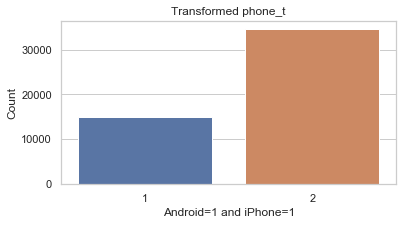

In [77]:
# Bar and Count PLot for the Binned phone_t Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('phone_t', data=data3)
ax.set_title('Transformed phone_t')
ax.set_xlabel('Android=1 and iPhone=1')
ax.set_ylabel('Count')

plt.show()

In [78]:
## creating a new column for this variable 
data3["city_t"]=data3["city"]
data3.head(1)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,Winterfell,1,1


In [79]:
## Binnng the all values for city_t attribute
data3.city_t[data3.city == "Astapor"] = 1
data3.city_t[data3.city == "King's Landing"] = 2
data3.city_t[data3.city == "Winterfell"] = 3
data3.head(3)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,1,1
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,...,False,0.0,0.0,1,2.0,2,2,1,1,1
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,...,False,0.0,0.0,1,0.0,1,2,3,1,1


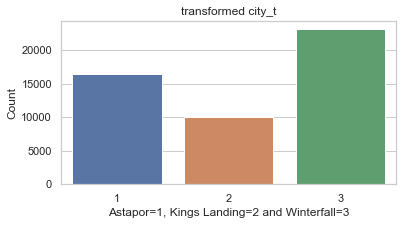

In [80]:
 # Bar and Count PLot for the Binned city_t Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('city_t', data=data3)
ax.set_title('transformed city_t')
ax.set_xlabel('Astapor=1, Kings Landing=2 and Winterfall=3')
ax.set_ylabel('Count')

plt.show()

In [81]:
# Creating a new column for the new binned Quantity Ultimate Black User 
data3["ultimate_black_user_t"]=data3["ultimate_black_user"]
data3.head(1)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,False,1


In [82]:
## Changing the values from boolean to 1 and 2
data3.ultimate_black_user_t[data3.ultimate_black_user == False] = "one"
data3.ultimate_black_user_t[data3.ultimate_black_user == True] = "two"
data3.head(3)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,one,1
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,...,False,0.0,0.0,1,2.0,2,2,1,one,1
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,...,False,0.0,0.0,1,0.0,1,2,3,one,1


In [83]:
## Changing the values from boolean to 1 and 2
data3.ultimate_black_user_t[data3.ultimate_black_user_t == "one"] = 1
data3.ultimate_black_user_t[data3.ultimate_black_user_t == "two"] = 2
data3.head(3)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,1,1
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,...,False,0.0,0.0,1,2.0,2,2,1,1,1
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,...,False,0.0,0.0,1,0.0,1,2,3,1,1


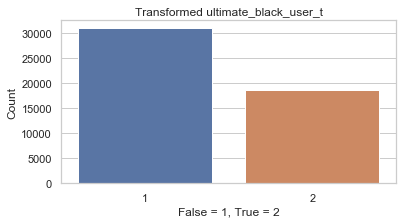

In [84]:
 # Bar and Count PLot for the Binned ultimate_black_user_t Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('ultimate_black_user_t', data=data3)
ax.set_title('Transformed ultimate_black_user_t')
ax.set_xlabel('False = 1, True = 2')
ax.set_ylabel('Count')

plt.show()

In [85]:
## creating a new column for this variable 
data3["trips_in_first_30_days_t"]=data3["trips_in_first_30_days"]
data3.head(1)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,1,1


In [86]:
## Binnng the all values for trips_in_first_30_days
data3.trips_in_first_30_days_t[data3.trips_in_first_30_days > 0] = 1
data3.head(3)

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,...,ultimate_black_user,weekday_pct,avg_rating_by_driver_t,avg_rating_by_driver_bin,avg_rating_of_driver_t,avg_rating_of_driver_bin,phone_t,city_t,ultimate_black_user_t,trips_in_first_30_days_t
0,90,6.28,NaN,5.0,1.0,Winterfell,2/9/2014,iPhone,1/10/2014,0.0,...,False,0.0,0.0,1,5.0,5,2,3,1,1
1,274,6.00,NaN,2.0,4.0,Astapor,2/9/2014,iPhone,1/25/2014,100.0,...,False,0.0,0.0,1,2.0,2,2,1,1,1
2,277,1.82,NaN,NaN,1.0,Winterfell,1/26/2014,iPhone,1/25/2014,0.0,...,False,0.0,0.0,1,0.0,1,2,3,1,1


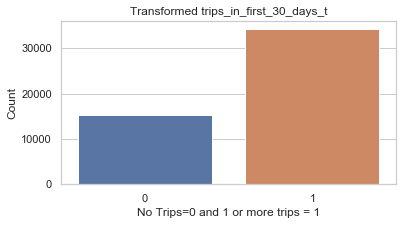

In [87]:
 # Bar and Count PLot for the Binned Target Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('trips_in_first_30_days_t', data=data3)
ax.set_title('Transformed trips_in_first_30_days_t')
ax.set_xlabel('No Trips=0 and 1 or more trips = 1')
ax.set_ylabel('Count')

plt.show()

In [88]:
## Creating a Bar Chart and Inferential Statistics for an individual attribute
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    49604.000000
mean         0.691315
std          0.461955
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: trips_in_first_30_days_t, dtype: float64
mode:  0    1
dtype: int64
1    34292
0    15312
Name: trips_in_first_30_days_t, dtype: int64


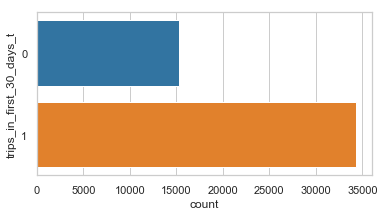

In [89]:
# Target Variable: 
count, ax = plt.subplots(figsize=(6,3))
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(data3, y = 'trips_in_first_30_days_t', palette=c_palette)
plt.show()

In [92]:
## Column Check
data3.columns

Index(['Unnamed: 0', 'avg_dist', 'avg_rating_by_driver',
       'avg_rating_of_driver', 'avg_surge', 'city', 'last_trip_date', 'phone',
       'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'avg_rating_by_driver_t',
       'avg_rating_by_driver_bin', 'avg_rating_of_driver_t',
       'avg_rating_of_driver_bin', 'phone_t', 'city_t',
       'ultimate_black_user_t', 'trips_in_first_30_days_t'],
      dtype='object')

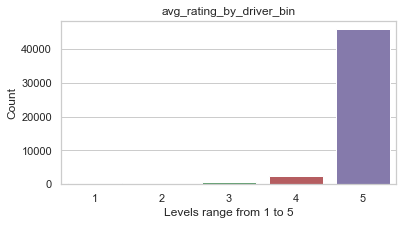

In [101]:
 # Bar and Count PLot for the input variable 
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('avg_rating_by_driver_bin', data=data3)
ax.set_title('avg_rating_by_driver_bin')
ax.set_xlabel('Levels range from 1 to 5')
ax.set_ylabel('Count')

plt.show()

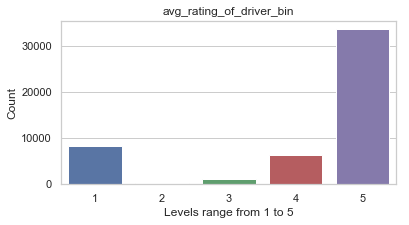

In [95]:
 # Bar and Count PLot for the input variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('avg_rating_of_driver_bin', data=data3)
ax.set_title('avg_rating_of_driver_bin')
ax.set_xlabel('Levels range from 1 to 5')
ax.set_ylabel('Count')

plt.show()

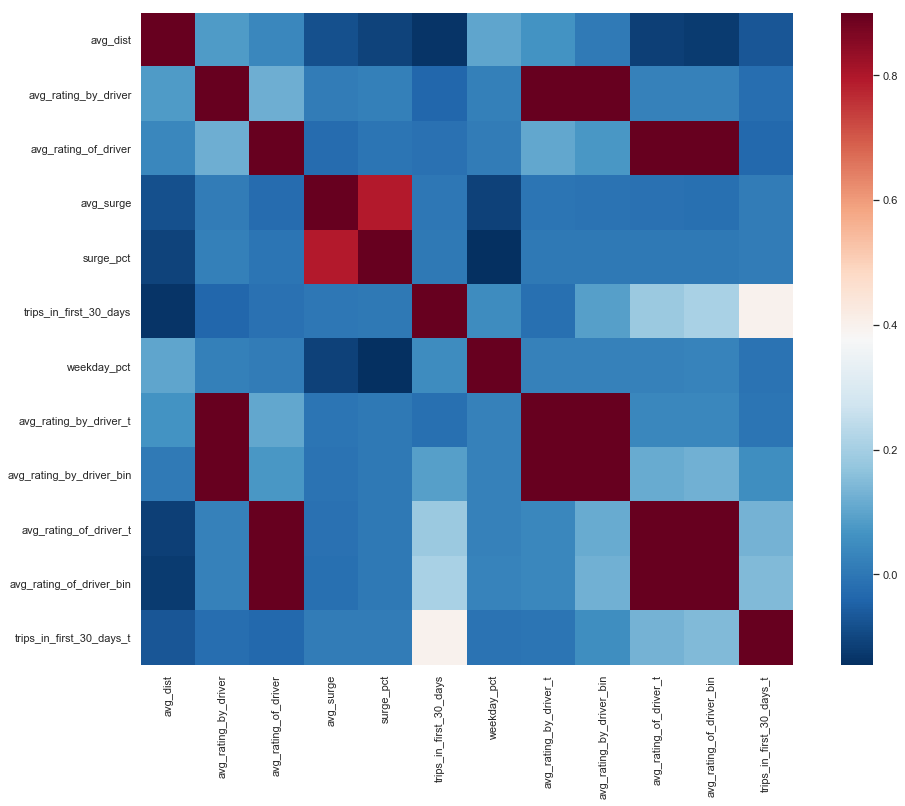

In [62]:
## The correlations between dependent variable and independent variables for all numerical datapoints
## correlation matrix
corr2 = data3.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(17, 12))
sns.heatmap(corr2, vmax = 0.9, cmap = 'RdBu_r', square = True)
plt.show()

In [64]:
# Shape of the Data and creating a sample size of 25%
 
data_s=data3.sample(frac=0.25, random_state=99)
data_s.shape

(12401, 21)

In [65]:
## Column Check
data_s.columns

Index(['Unnamed: 0', 'avg_dist', 'avg_rating_by_driver',
       'avg_rating_of_driver', 'avg_surge', 'city', 'last_trip_date', 'phone',
       'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'avg_rating_by_driver_t',
       'avg_rating_by_driver_bin', 'avg_rating_of_driver_t',
       'avg_rating_of_driver_bin', 'phone_t', 'city_t',
       'ultimate_black_user_t', 'trips_in_first_30_days_t'],
      dtype='object')

In [124]:
## Creating the original Dataset for these models
data_m = data_s[['avg_surge','surge_pct', 'weekday_pct', 'avg_rating_by_driver_bin', 'avg_dist',
       'avg_rating_of_driver_bin', 'phone_t', 'city_t','ultimate_black_user_t', 'trips_in_first_30_days_t']]
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12401 entries, 24232 to 18963
Data columns (total 10 columns):
avg_surge                   12401 non-null float64
surge_pct                   12401 non-null float64
weekday_pct                 12401 non-null float64
avg_rating_by_driver_bin    12401 non-null int64
avg_dist                    12401 non-null float64
avg_rating_of_driver_bin    12401 non-null int64
phone_t                     12401 non-null object
city_t                      12401 non-null object
ultimate_black_user_t       12401 non-null object
trips_in_first_30_days_t    12401 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.0+ MB


In [125]:
# separating our independent and dependent variable
X = data_m.drop(["trips_in_first_30_days_t"], axis = 1)
y = data_m["trips_in_first_30_days_t"]

In [126]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [127]:
# Initiate 7 classifier models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
ext = ExtraTreesClassifier(random_state=1)
svc = SVC(probability=True)
ada = AdaBoostClassifier()
gpc = GaussianProcessClassifier()


# Prepare lists
models = [ran, knn, log, ext, svc, ada, gpc,]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_test, y_test, scoring = "accuracy", cv = 5)
    scores.append(acc.mean())

In [128]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Base Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost','Extra Trees','Gaussian Process'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(7)

,Base Model,Score
0,Extra Trees,0.681647
1,Logistic Regression,0.679803
2,AdaBoost,0.671962
3,K Nearest Neighbour,0.638790
4,Gaussian Process,0.633495
5,Random Forest,0.624505
6,SVC,0.622903


(0.0, 0.75)

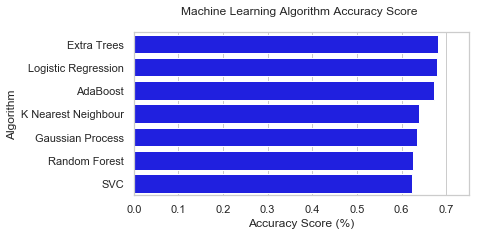

In [133]:
# Plot results for Accuracy scores
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x='Score', y = 'Base Model', data = result_df, color = 'blue')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.0, 0.75)

In [130]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':ran.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [131]:
# Plot results
print(importance)

                   Features  Importance
4                  avg_dist    0.607204
2               weekday_pct    0.125119
1                 surge_pct    0.054775
0                 avg_surge    0.049452
5  avg_rating_of_driver_bin    0.045996
7                    city_t    0.039881
8     ultimate_black_user_t    0.026160
3  avg_rating_by_driver_bin    0.025810
6                   phone_t    0.025602


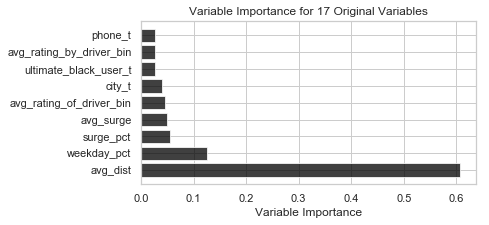

In [132]:
## PLotting the  variable importance
count, ax = plt.subplots(figsize=(6,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='black')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for 17 Original Variables')

plt.show()

In [126]:
##################################################################################################

In [102]:
# Shape of the Data and creating a sample size of 100%
 data_s2=data3.sample(frac=1, random_state=99)
data_s2.shape

(49604, 21)

In [162]:
## Creating the select Dataset for these models
data_m2 = data_s2[['avg_dist', 'weekday_pct', 'avg_surge', 'avg_rating_of_driver_bin', 'city_t', 'trips_in_first_30_days_t']]

data_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 24232 to 29313
Data columns (total 6 columns):
avg_dist                    49604 non-null float64
weekday_pct                 49604 non-null float64
avg_surge                   49604 non-null float64
avg_rating_of_driver_bin    49604 non-null int64
city_t                      49604 non-null object
trips_in_first_30_days_t    49604 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.6+ MB


In [163]:
# separating our independent and dependent variable
X = data_m2.drop(["trips_in_first_30_days_t"], axis = 1)
y = data_m2["trips_in_first_30_days_t"]

In [164]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [165]:
## Setting up the random forest with a balanced approach
rf=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [166]:
## Fitting the model
model=rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [167]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':model.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [168]:
## Printing Variable Importance 
print(importance)

                   Features  Importance
0                  avg_dist    0.574916
1               weekday_pct    0.174025
2                 avg_surge    0.152758
3  avg_rating_of_driver_bin    0.052042
4                    city_t    0.046260


In [169]:
## Calculating the best score
model.oob_score_

0.6172383847155883

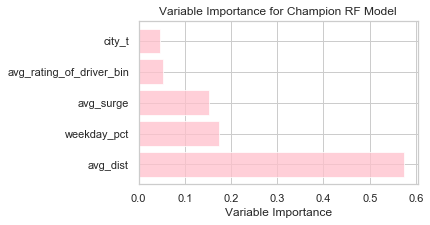

In [170]:
## Printing the Variable Importance Results 
count, ax = plt.subplots(figsize=(5,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='pink')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for Champion RF Model')

plt.show()

In [171]:
## Calcuating the Confusion Matrix 
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[2685, 2623],
       [3803, 8251]], dtype=int64)

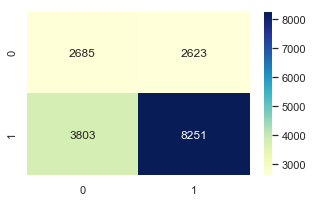

In [172]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [173]:
## RF Classification Report for the Precision, Recall and F1 Score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.41      0.51      0.46      5308
          1       0.76      0.68      0.72     12054

avg / total       0.65      0.63      0.64     17362



In [174]:
##################################################################################################################

In [175]:
## Creating the select Dataset for these models
data_m3 = data_s2[['avg_dist', 'weekday_pct', 'avg_surge', 'avg_rating_of_driver_bin', 'city_t', 'trips_in_first_30_days_t']]

data_m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 24232 to 29313
Data columns (total 6 columns):
avg_dist                    49604 non-null float64
weekday_pct                 49604 non-null float64
avg_surge                   49604 non-null float64
avg_rating_of_driver_bin    49604 non-null int64
city_t                      49604 non-null object
trips_in_first_30_days_t    49604 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.6+ MB


In [176]:
# separating our independent and dependent variable
X = data_m3.drop(["trips_in_first_30_days_t"], axis = 1)
y = data_m3["trips_in_first_30_days_t"]

In [177]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [178]:
## Baseline Logistic Model for Select Eight Attributes
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
## Calculating the Accuracy of the Model
y_pred = logreg.predict(X_test)
 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [180]:
## Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  152  5156]
 [  174 11880]]


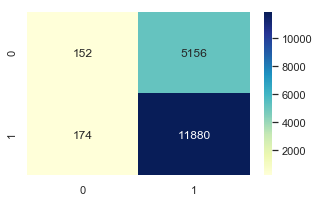

In [181]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [182]:
## Logistic Classification Report for the Precision, Recall and F1 Score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.47      0.03      0.05      5308
          1       0.70      0.99      0.82     12054

avg / total       0.63      0.69      0.58     17362



In [ ]:
################################################ the end ################################################